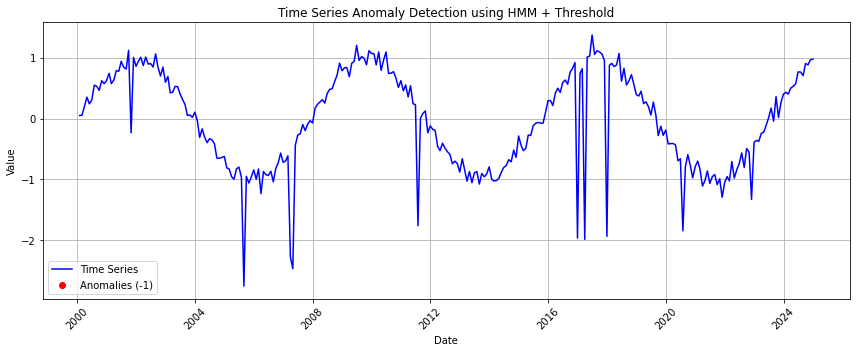

📊 Model Statistics (HMM-based Detection)
  - Total points               : 300
  - Anomalies detected (-1)    : 0
  - Anomaly ratio              : 0.00%
  - Threshold (log-likelihood): -201.7769
  - Score range (log-like)     : [-201.7769, -201.7769]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

# Step 1: Create synthetic time series (or use real data)
np.random.seed(42)
n = 300
dates = pd.date_range(start='2000-01-01', periods=n, freq='M')
values = np.sin(np.linspace(0, 20, n)) + 0.1 * np.random.randn(n)
anomaly_indices = np.random.choice(n, 10, replace=False)
values[anomaly_indices] = np.random.uniform(-3, 3, 10)

df = pd.DataFrame({'date': dates, 'value': values})

# Step 2: Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['value']])

# Step 3: Fit Gaussian HMM
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=42)
model.fit(X_scaled)

# Step 4: Compute log likelihoods
log_likelihoods = model.score_samples(X_scaled)[0]  # Per-sample log likelihood
df['score'] = log_likelihoods

# Step 5: Apply threshold on likelihoods
threshold = np.percentile(log_likelihoods, 5)
df['anomaly'] = np.where(df['score'] < threshold, -1, 1)

# Step 6: Plot time series with anomalies
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['value'], label='Time Series', color='blue')
plt.scatter(df[df['anomaly'] == -1]['date'], df[df['anomaly'] == -1]['value'],
            color='red', label='Anomalies (-1)')
plt.title("Time Series Anomaly Detection using HMM + Threshold")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Show statistics
print("📊 Model Statistics (HMM-based Detection)")
print(f"  - Total points               : {len(df)}")
print(f"  - Anomalies detected (-1)    : {np.sum(df['anomaly'] == -1)}")
print(f"  - Anomaly ratio              : {np.mean(df['anomaly'] == -1) * 100:.2f}%")
print(f"  - Threshold (log-likelihood): {threshold:.4f}")
print(f"  - Score range (log-like)     : [{df['score'].min():.4f}, {df['score'].max():.4f}]")


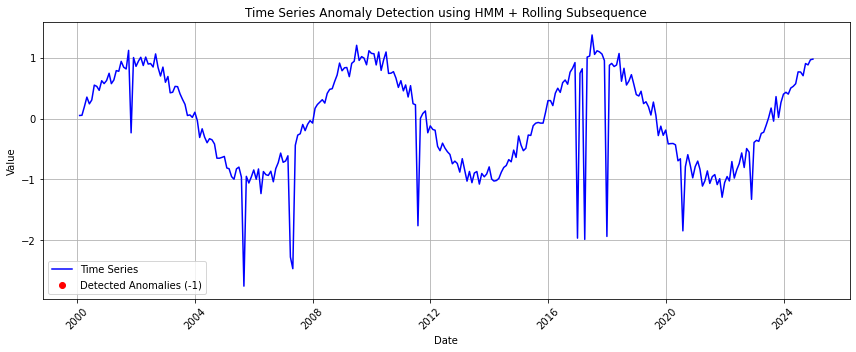

📊 Model Statistics (HMM + Subsequence)
  - Subsequence window size     : 20
  - Total subsequences          : 280
  - Anomalies detected (-1)     : 0
  - Anomaly ratio               : 0.00%
  - Threshold (log-likelihood)  : -4594.2119
  - Score range (log-likelihood): [-4594.2119, -4594.2119]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

# Step 1: Create synthetic time series
np.random.seed(42)
n = 300
dates = pd.date_range(start='2000-01-01', periods=n, freq='M')
values = np.sin(np.linspace(0, 20, n)) + 0.1 * np.random.randn(n)
anomaly_indices = np.random.choice(n, 10, replace=False)
values[anomaly_indices] = np.random.uniform(-3, 3, 10)

df = pd.DataFrame({'date': dates, 'value': values})

# Step 2: Create rolling window subsequences
window_size = 20
X = []
indices = []

for i in range(n - window_size):
    subseq = values[i:i + window_size]
    X.append(subseq)
    indices.append(i + window_size - 1)  # endpoint of each subsequence

X = np.array(X)

# Step 3: Normalize subsequences
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train HMM on rolling subsequences
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=100, random_state=42)
model.fit(X_scaled)

# Step 5: Score subsequences (log likelihood)
log_likelihoods = model.score_samples(X_scaled)[0]
threshold = np.percentile(log_likelihoods, 5)  # bottom 5% considered anomalies

# Step 6: Classify anomalies
labels = np.where(log_likelihoods < threshold, -1, 1)

# Step 7: Map results back to time series
df['anomaly'] = 1
for idx in np.where(labels == -1)[0]:
    end_point = indices[idx]
    df.loc[end_point, 'anomaly'] = -1

# Step 8: Plot results
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['value'], label='Time Series', color='blue')
plt.scatter(df[df['anomaly'] == -1]['date'], df[df['anomaly'] == -1]['value'],
            color='red', label='Detected Anomalies (-1)')
plt.title("Time Series Anomaly Detection using HMM + Rolling Subsequence")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 9: Show model statistics
print("📊 Model Statistics (HMM + Subsequence)")
print(f"  - Subsequence window size     : {window_size}")
print(f"  - Total subsequences          : {len(X)}")
print(f"  - Anomalies detected (-1)     : {np.sum(labels == -1)}")
print(f"  - Anomaly ratio               : {np.mean(labels == -1) * 100:.2f}%")
print(f"  - Threshold (log-likelihood)  : {threshold:.4f}")
print(f"  - Score range (log-likelihood): [{log_likelihoods.min():.4f}, {log_likelihoods.max():.4f}]")
